In [1]:
%matplotlib notebook

import sys
import logging
import matplotlib.pyplot as plt

sys.path.append("../DesignTool")
from smdtLibs.configFile import ConfigFile
from targets import TargetList
from smdtLibs.inOutChecker import InOutChecker
from maskLayouts import MaskLayouts, shrinkMask
from smdtLibs import utils, drawUtils

In [2]:
try:
    %load_ext nb_black
except:
    print("Ignored extension: nb_black")
    pass

<IPython.core.display.Javascript object>

In [3]:
logging.disable()

<IPython.core.display.Javascript object>

## Initialize configuration and read parameter file

The config file smdt.cfg contains general parameters for the application and the instrument, DEIMOS in this case.

The config file params.cfg contains parameters the user can modify through the UI. These are inherited from dsim.

In [4]:
config_fname = "../DesignTool/smdt.cfg"
param_fname = "../DesignTool/params.cfg"

config = ConfigFile(config_fname)
config.properties["params"] = ConfigFile(param_fname)

<IPython.core.display.Javascript object>

### Get the mask layout

MaskLayouts contains the geometry of the science detector.
There are various versions of the geometry.

"deimosOrig" is the layout inherited from dsim.

In [5]:
layout = MaskLayouts["deimos"]

<IPython.core.display.Javascript object>

### Read the targets, check what is inside and group by pcode

The pcode determines how the target is interpreted.
- \>= 0: selected
- -2: align box
- -1: guide box

In [6]:
#input_fname = "../DeimosExamples/EvanKirby/n2419c.list"
#input_fname = "../DeimosExamples/experimentMasksShared/denseNoOverlappingPa90Mask.out"
input_fname = "../DeimosExamples/Examples1/dec0Pa105.out"
tlist = TargetList(input_fname, config=config)

# Check what is inside the mask
tlist.markInside (layout)

allTargets = tlist.targets
selectedTargets = allTargets[allTargets.selected > 0]
selectedTargets = selectedTargets[selectedTargets.pcode >= 0]

alignBoxes = allTargets[allTargets.pcode == -2]
guideBoxes = allTargets[allTargets.pcode == -1]

inTargets = allTargets[allTargets.inMask > 0]
inSelectedTargets = selectedTargets[selectedTargets.inMask > 0]
inAlignBoxes = alignBoxes[alignBoxes.inMask > 0]
inGuideBoxes = guideBoxes[guideBoxes.inMask > 0]


HM_lens_09569    16:29:41.709 +00:49:43.51 2000 23.24 r    1 1 1
HM_lens_11329    16:29:48.328 +00:50:28.26 2000 24.68 r    2 1 1
HM_lens_11317    16:29:50.899 +00:50:20.56 2000 23.45 r    3 1 1
HM_lens_11158    16:29:46.992 +00:50:21.23 2000 24.00 r    4 1 1
HM_lens_13942    16:29:55.542 +00:53:18.72 2000 21.22 r   20 2 1
HM_lens_14604    16:29:34.111 +00:53:52.80 2000 21.58 r   44 2 1
HM_lens_14732    16:29:28.499 +00:54:06.59 2000 21.10 r  167 2 1
HM_lens_15128    16:29:19.650 +00:55:42.00 2000 21.84 r  177 2 1
HM_lens_15969    16:29:48.443 +00:55:53.87 2000 22.00 r  180 2 1
HM_lens_15134    16:29:16.884 +00:55:38.46 2000 22.47 r  190 2 1
HM_lens_15848    16:29:25.337 +00:55:39.65 2000 22.73 r  196 2 1
HM_lens_15907    16:29:16.217 +00:55:45.15 2000 22.76 r  197 2 1
HM_lens_16042    16:29:26.409 +00:56:01.35 2000 21.05 r  205 2 1
HM_lens_14865    16:29:47.875 +00:54:23.26 2000 21.62 r  306 2 1
HM_lens_14372    16:29:44.001 +00:53:42.43 2000 21.65 r  315 2 1
HM_lens_15899    16:29:15

636117           16:29:54.880  00:56:06.70 2000.0 23.720 I    1 2 0
592097           16:29:54.920  00:52:20.10 2000.0 23.831 I    1 2 0
731868           16:29:54.940  00:58:49.30 2000.0 22.950 I    1 2 0
715192           16:29:54.950  01:02:51.30 2000.0 24.746 I    1 2 0
730371           16:29:55.000  00:58:38.40 2000.0 24.362 I    1 2 0
675546           16:29:55.010  00:59:02.10 2000.0 23.285 I    1 2 0
567231           16:29:55.080  00:49:52.90 2000.0 23.448 I    1 2 0
597275           16:29:55.090  00:52:49.00 2000.0 23.632 I    1 2 0
631917           16:29:55.110  00:55:48.50 2000.0 23.174 I    1 2 0
687774           16:29:55.170  01:00:00.40 2000.0 19.062 I    1 2 0
594300           16:29:55.200  00:52:33.30 2000.0 21.590 I    1 2 0
607361           16:29:55.210  00:53:48.20 2000.0 21.405 I    1 2 0
699140           16:29:55.230  01:01:06.30 2000.0 22.616 I    1 2 0
700077           16:29:55.240  01:01:11.60 2000.0 23.338 I    1 2 0
630328           16:29:55.270  00:55:41.30 2000.

000645           16:29:41.950  00:50:13.10 2000.0 23.012 I    1 2 0
623381           16:29:41.950  00:55:09.80 2000.0 24.259 I    1 2 0
681191           16:29:41.980  00:59:28.00 2000.0 23.972 I    1 2 0
720696           16:29:41.990  00:57:30.40 2000.0 23.267 I    1 2 0
646739           16:29:42.000  00:56:52.00 2000.0 22.721 I    1 2 0
726029           16:29:42.000  00:58:06.60 2000.0 19.785 I    1 2 0
718063           16:29:42.010  00:57:11.70 2000.0 22.616 I    1 2 0
594817           16:29:42.020  00:52:35.60 2000.0 21.451 I    1 2 0
598285           16:29:42.020  00:52:55.00 2000.0 23.425 I    1 2 0
710167           16:29:42.030  01:02:56.40 2000.0 20.802 I    1 2 0
019141           16:29:42.050  00:52:02.70 2000.0 23.939 I    1 2 0
006268           16:29:42.060  00:50:47.50 2000.0 24.631 I    1 2 0
008861           16:29:42.070  00:51:03.10 2000.0 21.884 I    1 2 0
631456           16:29:42.090  00:55:46.40 2000.0 24.181 I    1 2 0
013415           16:29:42.120  00:51:29.20 2000.

009478           16:29:11.620  00:51:06.60 2000.0 23.592 I    1 2 0
660496           16:29:11.620  00:00:53.00 2000.0 24.400 I    1 2 0
619311           16:29:11.630  00:54:51.30 2000.0 24.166 I    1 2 0
009060           16:29:11.640  00:51:04.20 2000.0 23.592 I    1 2 0
710333           16:29:11.640  01:02:17.90 2000.0 22.560 I    1 2 0
656982           16:29:11.670  00:00:37.40 2000.0 24.311 I    1 2 0
723830           16:29:11.670  00:57:51.00 2000.0 23.410 I    1 2 0
559613           16:29:11.690  00:49:04.80 2000.0 24.461 I    1 2 0
704448           16:29:11.700  01:01:37.80 2000.0 23.840 I    1 2 0
626851           16:29:11.710  00:55:25.40 2000.0 22.529 I    1 2 0
712149           16:29:11.710  01:02:30.30 2000.0 21.844 I    1 2 0
601536           16:29:11.720  00:53:14.10 2000.0 24.744 I    1 2 0
644654           16:29:11.730  00:56:43.10 2000.0 24.551 I    1 2 0
543687           16:29:11.750  00:47:24.30 2000.0 21.016 I    1 2 0
655153           16:29:11.750  00:00:29.00 2000.

628095           16:29:31.900  00:55:31.30 2000.0 22.016 I    1 2 0
706011           16:29:31.910  01:01:51.80 2000.0 24.605 I    1 2 0
592327           16:29:31.940  00:52:21.50 2000.0 24.316 I    1 2 0
686533           16:29:31.940  00:59:54.40 2000.0 23.025 I    1 2 0
708135           16:29:31.950  01:02:02.40 2000.0 23.775 I    1 2 0
601111           16:29:31.990  00:00:42.40 2000.0 22.674 I    1 2 0
670225           16:29:31.990  00:01:38.40 2000.0 24.259 I    1 2 0
017337           16:29:32.040  00:51:51.90 2000.0 18.343 I  482 1 0
726081           16:29:32.040  00:58:07.10 2000.0 24.545 I    1 2 0
553009           16:29:32.050  00:48:28.40 2000.0 21.171 I    1 2 0
628777           16:29:32.050  00:55:34.50 2000.0 24.170 I    1 2 0
651362           16:29:32.050  00:00:12.20 2000.0 21.928 I    1 2 0
684940           16:29:32.070  00:59:46.40 2000.0 23.212 I    1 2 0
563459           16:29:32.090  00:49:29.30 2000.0 23.281 I    1 2 0
612464           16:29:32.090  00:54:16.40 2000.

698449           16:29:46.870  01:01:02.00 2000.0 22.840 I    1 2 0
595359           16:29:46.880  00:52:38.70 2000.0 24.093 I    1 2 0
613137           16:29:46.880  00:54:19.90 2000.0 24.089 I    1 2 0
615012           16:29:46.880  00:54:29.60 2000.0 22.703 I    1 2 0
686899           16:29:46.880  00:59:56.00 2000.0 18.914 I  482 1 0
565923           16:29:46.910  00:49:44.60 2000.0 24.376 I    1 2 0
634142           16:29:46.910  00:55:01.20 2000.0 23.685 I    1 2 0
634606           16:29:46.910  00:56:00.10 2000.0 23.685 I    1 2 0
641192           16:29:46.920  00:56:27.90 2000.0 22.955 I    1 2 0
721307           16:29:46.920  00:57:34.80 2000.0 23.956 I    1 2 0
653078           16:29:46.930  00:00:19.60 2000.0 20.438 I    1 2 0
672646           16:29:46.930  00:01:49.20 2000.0 19.208 I  481 1 0
542918           16:29:46.940  00:47:19.50 2000.0 24.243 I    1 2 0
008964           16:29:46.940  00:51:03.60 2000.0 23.201 I    1 2 0
624013           16:29:46.940  00:55:12.60 2000.

694772           16:29:01.320  01:00:39.40 2000.0 23.125 I    1 2 0
613631           16:29:01.330  00:54:22.40 2000.0 22.965 I    1 2 0
650449           16:29:01.330  00:00:08.40 2000.0 22.424 I    1 2 0
695992           16:29:01.330  01:00:47.50 2000.0 22.012 I    1 2 0
627396           16:29:01.340  00:55:27.80 2000.0 23.003 I    1 2 0
552523           16:29:01.370  00:48:21.60 2000.0 22.134 I    1 2 0
665333           16:29:01.370  00:01:15.30 2000.0 23.756 I    1 2 0
718089           16:29:01.370  00:57:11.90 2000.0 24.894 I    1 2 0
617774           16:29:01.390  00:54:43.80 2000.0 15.310 I    1 2 0
637832           16:29:01.390  00:56:13.80 2000.0 24.417 I    1 2 0
673153           16:29:01.400  00:01:51.40 2000.0 24.748 I    1 2 0
705215           16:29:01.400  01:01:42.80 2000.0 21.540 I    1 2 0
631937           16:29:01.410  00:55:48.60 2000.0 24.132 I    1 2 0
656547           16:29:01.410  00:00:35.50 2000.0 24.530 I    1 2 0
709188           16:29:01.410  01:02:10.00 2000.

<IPython.core.display.Javascript object>

### What is in tlist?

In [14]:
print (f"Number of rows:\t{len(allTargets):5d}, inside {len(inTargets):5d}")
print (f"Selected:\t{len(selectedTargets):5d}, inside {len(inSelectedTargets):5d}")
print (f"Align boxes:\t{len(alignBoxes):5d}, inside {len(inAlignBoxes):5d}")
print (f"Guide boxes:\t{len(guideBoxes):5d}, inside {len(inGuideBoxes):5d}")


Number of rows:	10909, inside  2286
Selected:	  462, inside   462
Align boxes:	  141, inside    27
Guide boxes:	    0, inside     0


<IPython.core.display.Javascript object>

In [15]:
print("Center RA = {} hrs".format(utils.toSexagecimal(tlist.centerRADeg / 15)))
print("       DEC= {} deg".format(utils.toSexagecimal(tlist.centerDEC)))
print("       PA =  {:.3f} deg".format(tlist.positionAngle))

Center RA =  17:18:46.80 hrs
       DEC=  57:58:55.20 deg
       PA =  90.000 deg


<IPython.core.display.Javascript object>

## Plot all targets

<IPython.core.display.Javascript object>


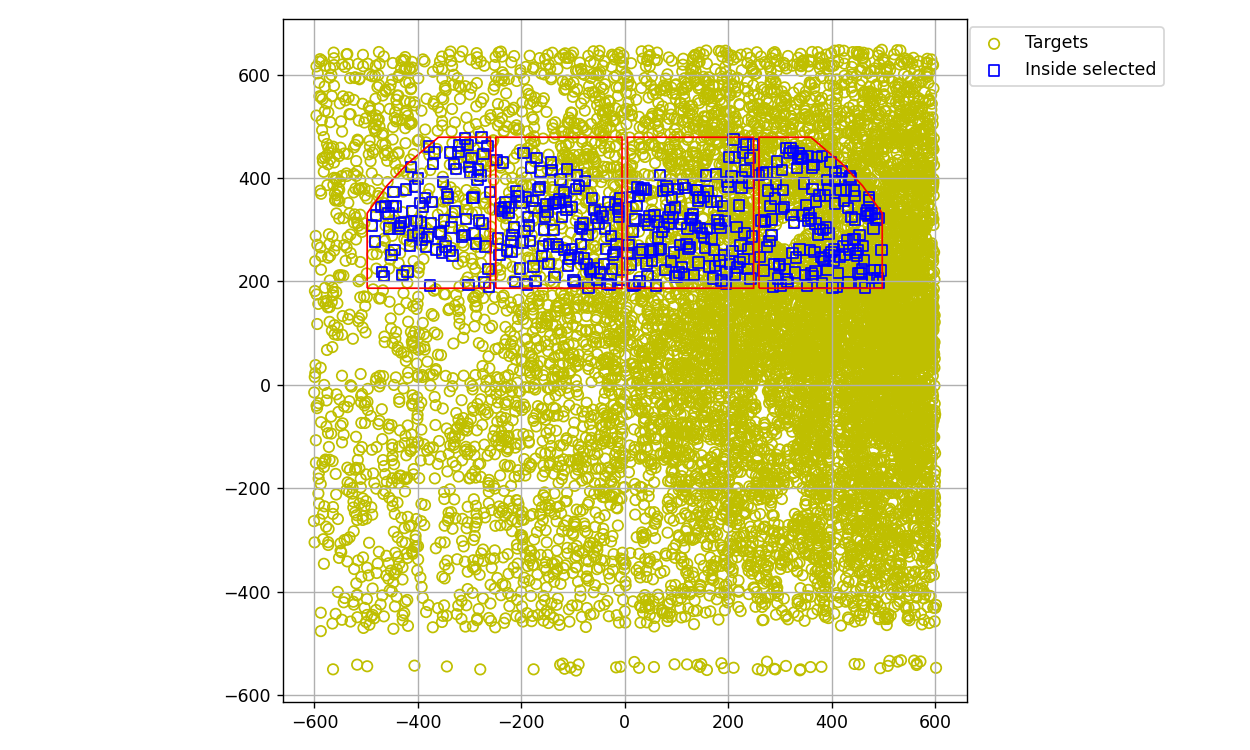

<IPython.core.display.Javascript object>

In [16]:
plt.figure(figsize=(10, 6))
plt.gca().set_aspect("equal")

# Plot the mask layout
drawUtils.drawPatch(plt.gca(), layout, fc="None", ec="r")

plt.scatter(allTargets.xarcs, allTargets.yarcs, c="None", ec="y", label="Targets")
plt.scatter(
    inSelectedTargets.xarcs,
    inSelectedTargets.yarcs,
    c="None",
    ec="b",
    marker="s",
    label="Inside selected",
)
plt.legend(bbox_to_anchor=(1.30, 1.0), loc="upper right")
plt.grid()
plt.tight_layout()

### Plot only inside the mask

<IPython.core.display.Javascript object>


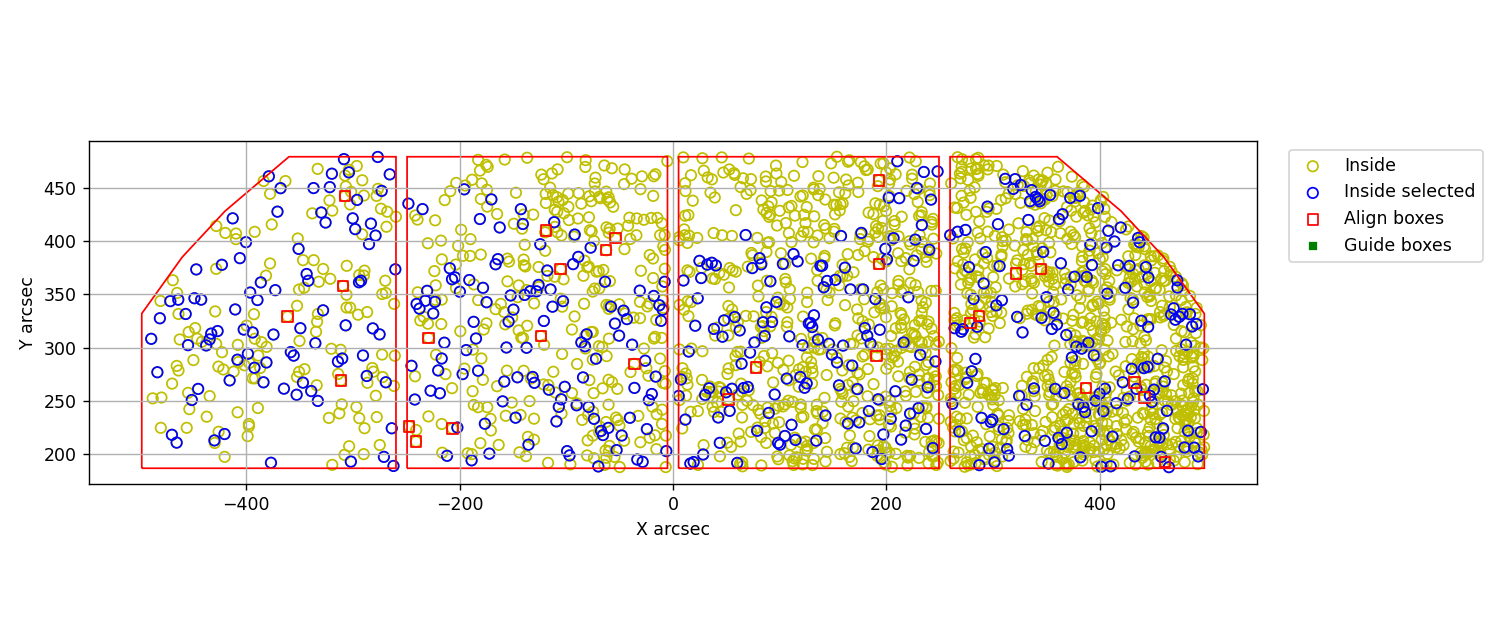

<IPython.core.display.Javascript object>

In [17]:
plt.figure(figsize=(12, 5))
plt.gca().set_aspect('equal')

# Plot the mask layou
drawUtils.drawPatch(plt.gca(), layout, fc='None', ec='r')

plt.scatter (inTargets.xarcs, inTargets.yarcs,  c='None', ec='y', label='Inside')
plt.scatter (inSelectedTargets.xarcs, inSelectedTargets.yarcs, fc='None', ec='b', 
            label="Inside selected")

plt.scatter (inAlignBoxes.xarcs, inAlignBoxes.yarcs, c='None', ec='r', marker='s', label='Align boxes')
plt.scatter (inGuideBoxes.xarcs, inGuideBoxes.yarcs, c='g', ec='w', marker='s', label='Guide boxes')

plt.legend(bbox_to_anchor=(1, 1.4), loc='upper right')
plt.xlabel ("X arcsec")
plt.ylabel ("Y arcsec")

plt.legend(bbox_to_anchor=(1.20, 1.0), loc="upper right")
plt.grid()
plt.tight_layout()


In [18]:
guideBoxes

,objectId,raHour,decDeg,eqx,mag,pBand,pcode,sampleNr,selected,slitLPA,length1,length2,slitWidth,orgIndex,inMask,xarcs,yarcs


<IPython.core.display.Javascript object>